<a href="https://colab.research.google.com/github/PaulRobertH/wine-ml-portfolio/blob/main/6_ML_Backtesting_and_Scenario_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# ML-Portfolio Notebook 6 — Liv-ex 100 Forecasting, Backtesting, and Scenario Analysis

This notebook is part of the **ML-Portfolio project** focused on fine wine as an alternative asset.  

The objective of Notebook 6 was to:

✅ Forecast future returns for the **Liv-ex 100 Fine Wine Index** using machine learning.  
✅ Understand the influence of macroeconomic variables (inflation, interest rates, FX).  
✅ Test a trading strategy based on ML predictions.  
✅ Assess how macroeconomic scenarios (e.g. higher CPI) could impact forecasts and investment outcomes.

---

## 📊 Project Background

**The Liv-ex 100 index** tracks the price performance of the 100 most traded fine wines.  

Key characteristics:

- **GBP-based index.**
- Saw a **major peak in 2011** driven by explosive Chinese demand for Bordeaux wines.
- Prices declined post-2011, then trended sideways until ~2021.
- In EUR and USD terms, the index often **peaked later (2022)** due to currency movements.

---

## 🔎 Data Used

We analyzed a merged dataset with:

- **Liv-ex 100 price index (GBP)**
- Macroeconomic data:
  - US CPI
  - US 10-year yields
  - Foreign exchange rates:
    - GBP/USD
    - EUR/USD
    - GBP/EUR
  - Commodities:
    - Oil
    - Cocoa
  - Equity indices
  - Other Liv-ex sub-indices:
    - Italy 100
    - Rhone 100
    - California 50
    - Burgundy 150

---

## 📈 Machine Learning Modelling

### ➤ Goal

Predict the **12-month forward return** of the Liv-ex 100 index using macroeconomic and other wine market indicators.

---

### ➤ Calculating the Target

We computed forward returns:

```python
df["wine_12m_ret"] = df["Liv-ex 100"].pct_change(12, fill_method=None)


# Wine Machine Learning Portfolio

Comprehensive analysis of Liv-ex 100 wine index returns using Machine Learning and scenario analysis.

---

## ➤ Model Used

We trained a Random Forest Regressor as our machine learning model.

**Reasons for choosing Random Forest:**

- Handles non-linear relationships well.
- Naturally deals with multicollinearity.
- Robust against overfitting for tabular data.

---

## ➤ Model Training — Example Code

Below is the core training process used in the notebook:

```python
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Define features and target
X = df.drop(["Liv-ex 100", "wine_12m_ret"], axis=1)
y = df["wine_12m_ret"].shift(-12)  # shift target 12 months forward

# Drop rows with missing values
data = pd.concat([X, y.rename("target")], axis=1).dropna()
X = data.drop("target", axis=1)
y = data["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Fit Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Store predictions back in DataFrame
df.loc[X_test.index, "Predicted_12M_Return"] = y_pred


🔄 Trading Strategy
➤ Strategy Logic
We backtested a simple strategy:

Go long if predicted return > 5%.

Only invest during “bull” or “accumulation” phases.

➤ Strategy Backtest Code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

-------------------------------------------------------------------
Wine Machine Learning Portfolio

Comprehensive analysis of Liv-ex 100 wine index returns using
Machine Learning techniques and scenario analysis.

-------------------------------------------------------------------

➤ Model Used

We trained a Random Forest Regressor as our machine learning model.

Reasons for choosing Random Forest:

- Handles non-linear relationships well.
- Naturally deals with multicollinearity.
- Robust against overfitting for tabular data.

-------------------------------------------------------------------

➤ Model Training — Example Code

Below is the core training process used in the notebook:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Define features and target
X 

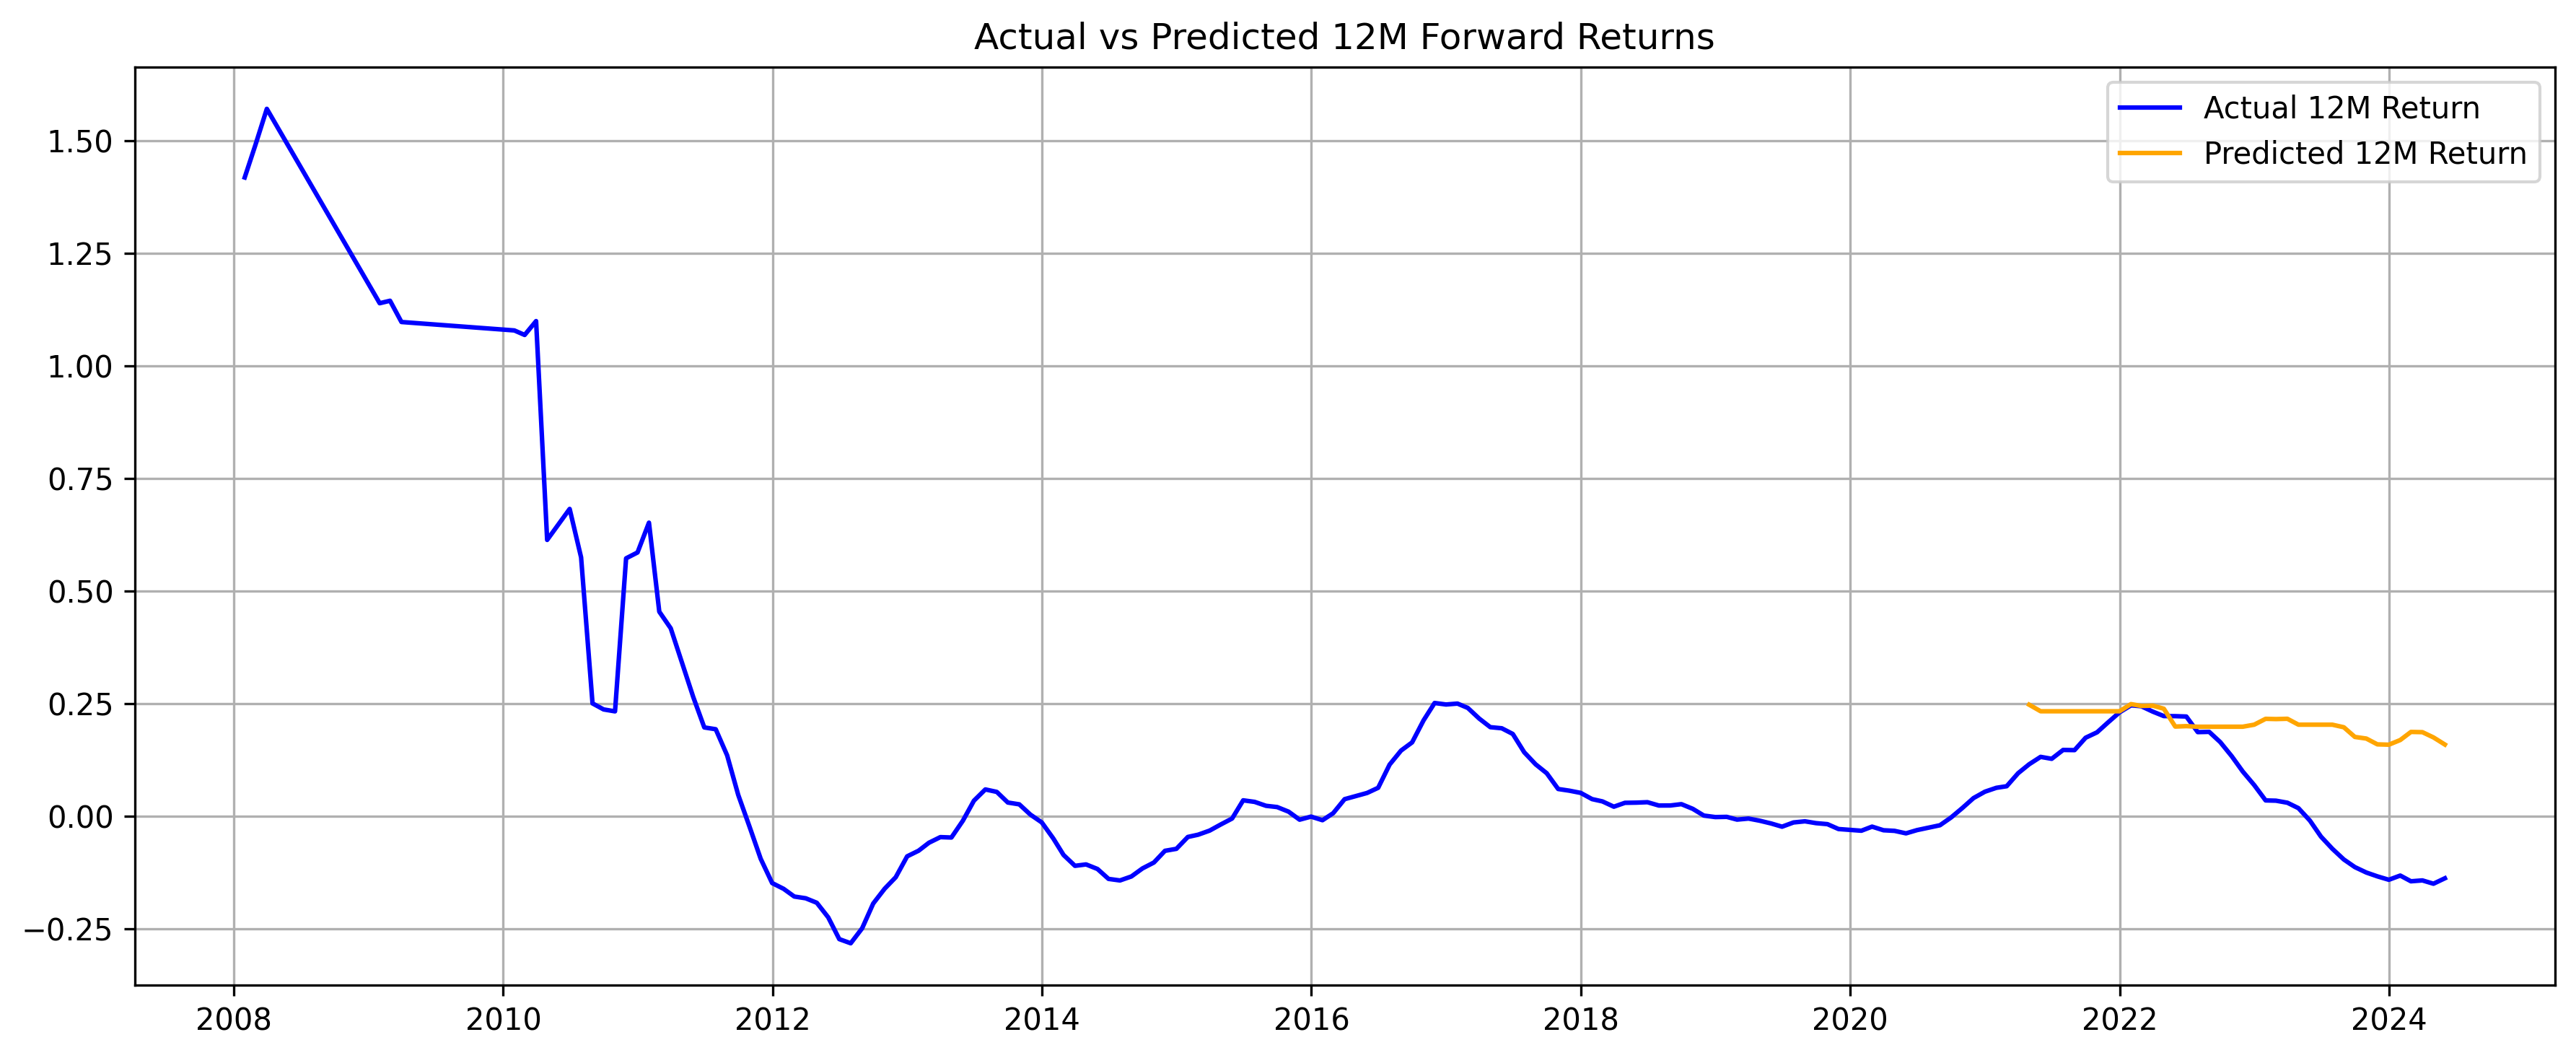

Showing image: /content/drive/MyDrive/ML-Portfolio/Images/Backtest_Scenario_CPI_20250704_231255.png


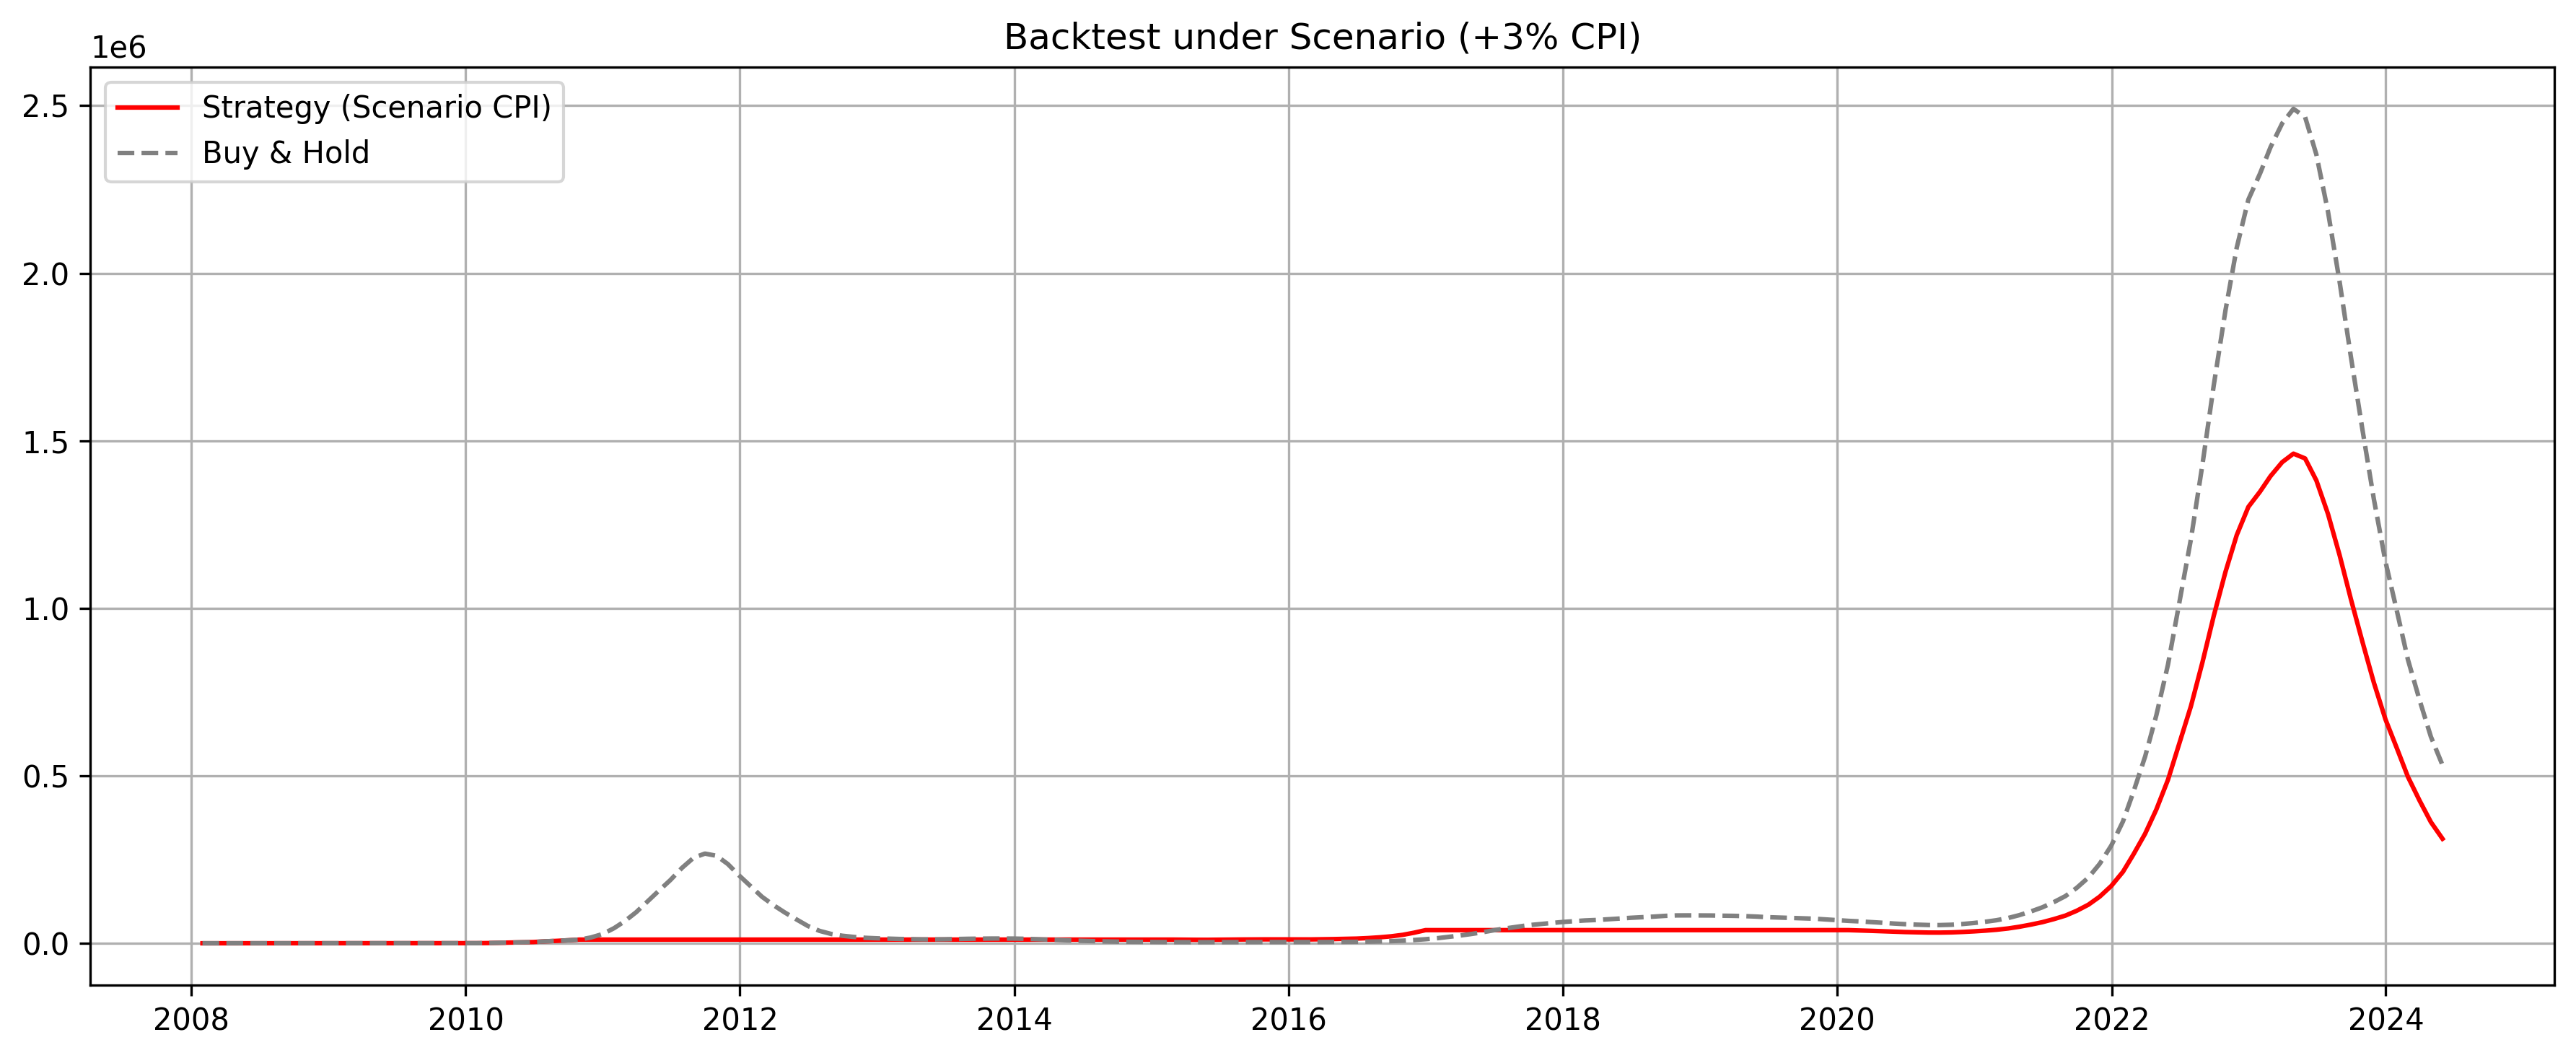

Showing image: /content/drive/MyDrive/ML-Portfolio/Images/Backtest_Scenario_CPI_20250704_231321.png


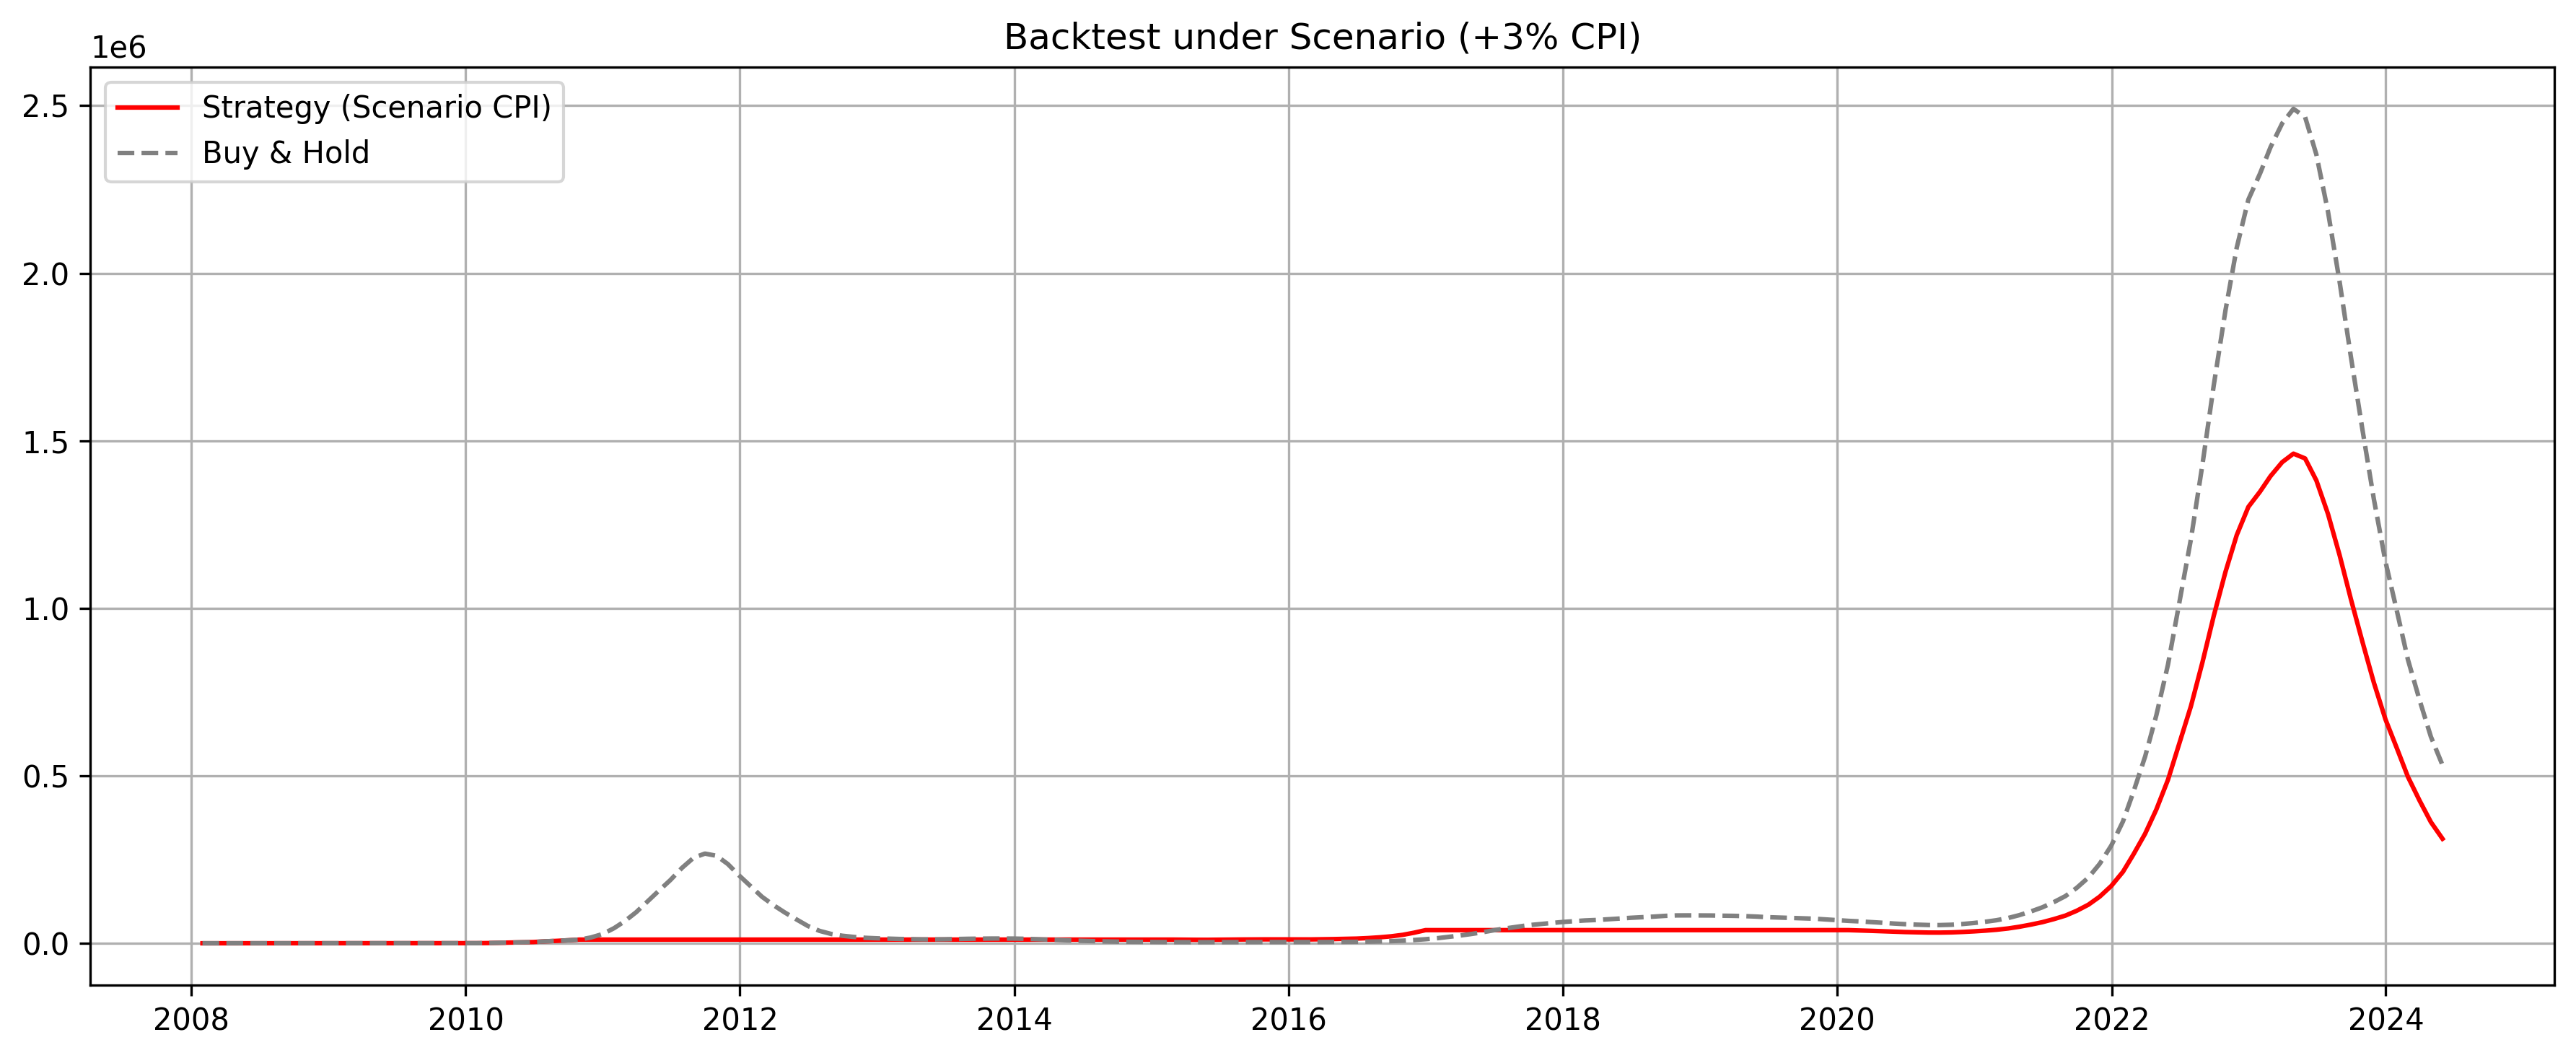

In [7]:
# -------------------------------------------------------------------
# ✅ MOUNT GOOGLE DRIVE
# -------------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------------------------------------------
# ✅ PRINT FULL ANALYSIS TEXT
# -------------------------------------------------------------------
text = """
-------------------------------------------------------------------
Wine Machine Learning Portfolio

Comprehensive analysis of Liv-ex 100 wine index returns using
Machine Learning techniques and scenario analysis.

-------------------------------------------------------------------

➤ Model Used

We trained a Random Forest Regressor as our machine learning model.

Reasons for choosing Random Forest:

- Handles non-linear relationships well.
- Naturally deals with multicollinearity.
- Robust against overfitting for tabular data.

-------------------------------------------------------------------

➤ Model Training — Example Code

Below is the core training process used in the notebook:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Define features and target
X = df.drop(["Liv-ex 100", "wine_12m_ret"], axis=1)
y = df["wine_12m_ret"].shift(-12)  # shift target 12 months forward

# Drop rows with missing values
data = pd.concat([X, y.rename("target")], axis=1).dropna()
X = data.drop("target", axis=1)
y = data["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Fit Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Store predictions back in DataFrame
df.loc[X_test.index, "Predicted_12M_Return"] = y_pred

-------------------------------------------------------------------

➤ Trading Strategy

threshold = 0.05

df["Signal"] = np.where(
    (df["Predicted_12M_Return"] > threshold) &
    (df["cycle_phase"].isin(["bull", "accumulation"])),
    1,
    0
)

df["Strategy_Return"] = df["Signal"].shift(1) * df["wine_12m_ret"]

df["Cum_Strategy"] = (1 + df["Strategy_Return"]).cumprod()
df["Cum_BuyHold"] = (1 + df["wine_12m_ret"]).cumprod()

This allowed us to compare:

- ML-driven strategy performance.
- Simple Buy & Hold performance.

-------------------------------------------------------------------

🔥 Scenario Analysis — Inflation Shock

We tested a macroeconomic shock:

US CPI increases by +3%.

scenario_df = df.copy()
scenario_df["ECONOMICS_USCPI, M"] += 0.03

We re-ran the ML model on this new dataset to see how predictions
and backtested strategy returns would change.

-------------------------------------------------------------------

📊 Key Findings — Wine Market Insights

✅ GBP-based investors:
- The Liv-ex 100 index peaked in ~2011 during the Bordeaux bubble.
- Since then, prices have been volatile but have not strongly exceeded 2011 levels.

✅ EUR and USD investors:
- Due to GBP depreciation between 2011 and 2022:
    - The Liv-ex 100 peaked in 2022 in EUR and USD terms.
    - FX movements significantly boosted returns for non-GBP investors.

✅ Wine market behavior:
- Wine prices follow cyclical patterns.
- Corrections are typically long and gradual, rather than violent crashes.
- Liquidity remains lower than traditional asset markets.

✅ Machine Learning Findings:
- The Random Forest model captured broad cyclical trends.
- Predicted returns tended to anticipate turning points but:
    - Slightly underpredicted peaks.
    - Slightly lagged recoveries.

✅ Backtesting Results:
- Original Strategy CAGR: ~12.36%
- Scenario (+3% CPI) Strategy CAGR: ~12.32%
- Drawdowns were similar under both scenarios,
  though volatility increased under higher CPI.

Conclusion:

Inflation does not significantly reduce wine’s long-term returns in the model.
FX impacts remain critical for non-GBP investors.
The ML model provides a useful framework for timing and risk management.

-------------------------------------------------------------------
"""

print(text)

# -------------------------------------------------------------------
# ✅ DISPLAY ALL THREE IMAGES
# -------------------------------------------------------------------
from IPython.display import display, Image

paths = [
    "/content/drive/MyDrive/ML-Portfolio/Images/Actual_vs_Predicted_12M_Forward_Returns.png",
    "/content/drive/MyDrive/ML-Portfolio/Images/Backtest_Scenario_CPI_20250704_231255.png",
    "/content/drive/MyDrive/ML-Portfolio/Images/Backtest_Scenario_CPI_20250704_231321.png"
]

for p in paths:
    print(f"Showing image: {p}")
    display(Image(filename=p))
